In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import itertools
# import randomized search
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics
from common.preprocessor import load_data
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error

In [22]:
# Load dataset
# data = load_data('./data','Commodity Prices Monthly.csv')

In [23]:
data = pd.read_csv("Prophet data.csv")

In [24]:
data.head()

,ds,y
0,2018-01-01,69.09
1,2018-02-01,65.70
2,2018-03-01,66.68
3,2018-04-01,71.67
4,2018-05-01,77.06


In [25]:
# data = data.reset_index()

In [26]:
data.head()

,ds,y
0,2018-01-01,69.09
1,2018-02-01,65.70
2,2018-03-01,66.68
3,2018-04-01,71.67
4,2018-05-01,77.06


In [27]:
# data.columns = ['ds', 'y']

In [28]:
data

,ds,y
0,2018-01-01,69.09
1,2018-02-01,65.70
2,2018-03-01,66.68
3,2018-04-01,71.67
4,2018-05-01,77.06
5,2018-06-01,75.94
6,2018-07-01,75.04
7,2018-08-01,73.85
8,2018-09-01,79.09
9,2018-10-01,80.63


In [29]:
data.dtypes

ds     object
y     float64
dtype: object

In [30]:
data.describe() # display the summary statistics of the data


,y
count,60.000000
mean,69.697500
std,19.721106
min,26.630000
25%,60.080000
50%,67.695000
75%,79.475000
max,117.220000


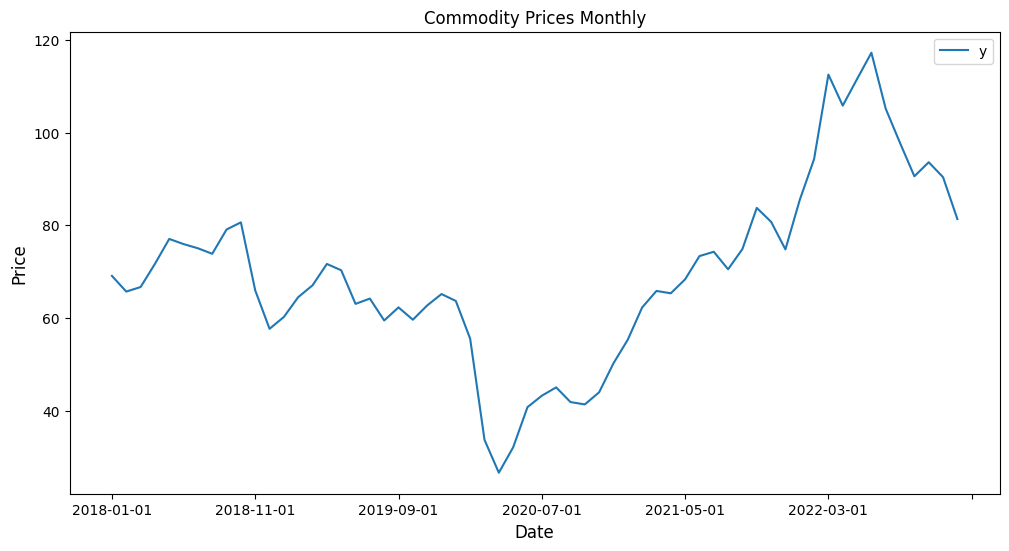

In [31]:
# plot the data
data.plot(x='ds', y= 'y', title='Commodity Prices Monthly', figsize=(12, 6))
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.show()

In [32]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

In [33]:
train

,Unnamed: 0,Price
0,2018-01-01,69.09
1,2018-02-01,65.70
2,2018-03-01,66.68
3,2018-04-01,71.67
4,2018-05-01,77.06
5,2018-06-01,75.94
6,2018-07-01,75.04
7,2018-08-01,73.85
8,2018-09-01,79.09
9,2018-10-01,80.63


In [34]:
test

,Unnamed: 0,Price
0,2022-01-01,85.48
1,2022-02-01,94.28
2,2022-03-01,112.51
3,2022-04-01,105.81
4,2022-05-01,111.55
5,2022-06-01,117.22
6,2022-07-01,105.14
7,2022-08-01,97.74
8,2022-09-01,90.57
9,2022-10-01,93.60


In [35]:
train.columns = ['ds','y']

In [36]:
test.columns = ['ds','y']

In [37]:
train

,ds,y
0,2018-01-01,69.09
1,2018-02-01,65.70
2,2018-03-01,66.68
3,2018-04-01,71.67
4,2018-05-01,77.06
5,2018-06-01,75.94
6,2018-07-01,75.04
7,2018-08-01,73.85
8,2018-09-01,79.09
9,2018-10-01,80.63


In [38]:
Prophet??

Init signature:
Prophet(
    growth='linear',
    changepoints=None,
    n_changepoints=25,
    changepoint_range=0.8,
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    holidays=None,
    seasonality_mode='additive',
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0,
    changepoint_prior_scale=0.05,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    stan_backend=None,
    scaling: str = 'absmax',
    holidays_mode=None,
)
Source:        
class Prophet(object):
    """Prophet forecaster.

    Parameters
    ----------
    growth: String 'linear', 'logistic' or 'flat' to specify a linear, logistic or
        flat trend.
    changepoints: List of dates at which to include potential changepoints. If
        not specified, potential changepoints are selected automatically.
    n_changepoints: Number of potential changepoints to include. Not used
        if input `changepoints` is supplied. If `changepoin

In [39]:
# perform hyperparameter tuning with randomized search
# define the parameter grid
param_grid = {
    'changepoint_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'n_changepoints': [10, 20, 30, 40, 50],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'holidays_prior_scale': [0.01, 0.1, 1.0, 10.0],
    'seasonality_mode': ['additive', 'multiplicative'],
    'daily_seasonality': [True, False],
    'weekly_seasonality': [True, False],
    'yearly_seasonality': [True, False]
}

# initialize the model
model = Prophet()

# initialize the randomized search
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=10, scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=1)

# fit the model
random_search.fit(train)

# print the best parameters
print(random_search.best_params_)
# {'seasonality_prior_scale': 0.1, 'seasonality_mode': 'multiplicative', 'n_changepoints': 10, 'holidays_prior_scale': 0.1, 'daily_seasonality': False, 'weekly_seasonality': False, 'yearly_seasonality': True, 'changepoint_prior_scale': 0.1}


TypeError: Cannot clone object '<prophet.forecaster.Prophet object at 0x00000205465CA2C0>' (type <class 'prophet.forecaster.Prophet'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

In [97]:

# Initialize the Prophet model
model = Prophet(seasonality_mode='additive', yearly_seasonality=True)

# Fit the model with your training data
model.fit(train)

16:03:54 - cmdstanpy - INFO - Chain [1] start processing
16:03:55 - cmdstanpy - INFO - Chain [1] done processing


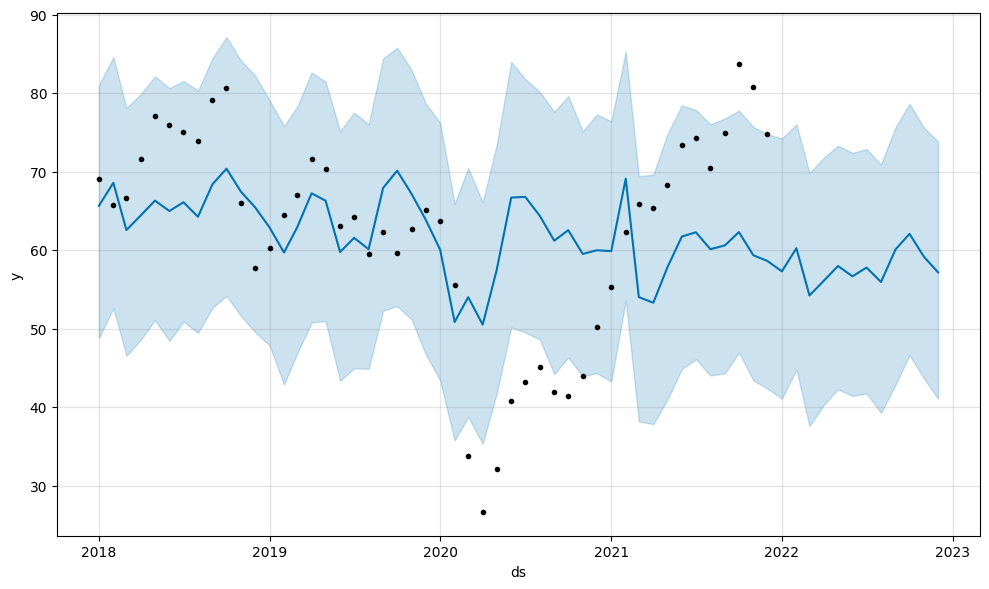

In [98]:


# Create an empty dataframe to hold your future predictions
future = model.make_future_dataframe(periods=len(test), freq= 'MS')

# Use the model to make predictions
forecast = model.predict(future)

# Plot the original data and the forecast
model.plot(forecast)
plt.show()


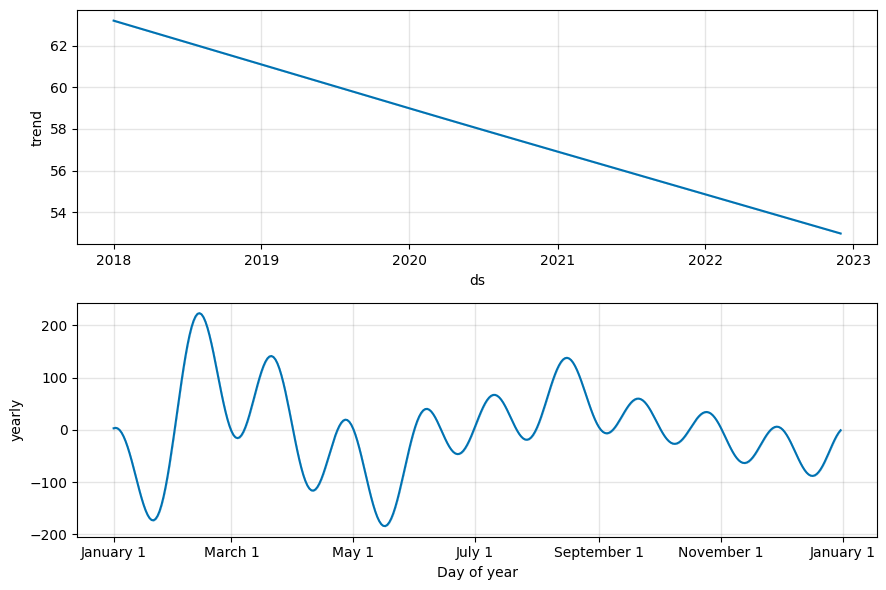

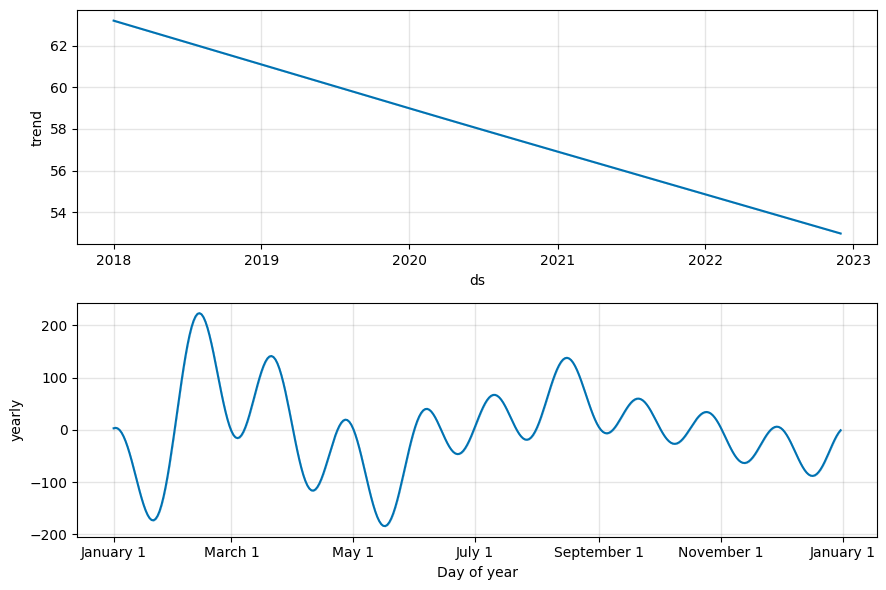

In [99]:
model.plot_components(forecast)

In [100]:
forecast[['ds','yhat']]

,ds,yhat
0,2018-01-01,65.633842
1,2018-02-01,68.574306
2,2018-03-01,62.552122
3,2018-04-01,64.442552
4,2018-05-01,66.297502
5,2018-06-01,64.980174
6,2018-07-01,66.094071
7,2018-08-01,64.248834
8,2018-09-01,68.389216
9,2018-10-01,70.372331


In [101]:
mean_squared_error(data['y'], forecast[['yhat']])

492.21476157951037

In [102]:
mean_absolute_percentage_error(data['y'], forecast[['yhat']])

0.24175702629027956